    Abgabe Marquardt 3706017 Data Exploration Project

In [1]:
# Imports

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, f_classif, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, make_scorer

    START EXPLORATION

In [2]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Load dataset
path = "mushrooms.csv"
mushroom_data = pd.read_csv(path)

In [3]:
# Print shape of mushrooms.csv
mushroom_data.shape

(8124, 23)

In [4]:
# Print first 5 rows of mushrooms.csv
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Show column names in mushrooms.csv
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# Show general information about mushrooms.csv
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# Show statistical information about mushrooms.csv
mushroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

'e' occurs 4208 times
'p' occurs 3916 times


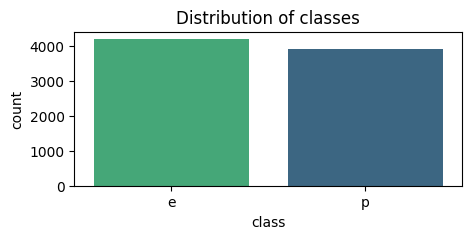

In [9]:
# Determine the frequency of the classes and sort by size
class_counts = mushroom_data['class'].value_counts().sort_values(ascending=False).index

# List of class values to count
class_values = ['e', 'p']

# Loop through class values and count occurrences
for class_val in class_values:
    sum_class = (mushroom_data['class'] == class_val).sum()
    print(f"'{class_val}' occurs {sum_class} times")

# Visualization of the class-distributions
plt.figure(figsize=(5, 2))
sns.countplot(x='class', hue='class', data=mushroom_data, palette='viridis', order=class_counts, legend=False)
plt.title('Distribution of classes')
plt.show()

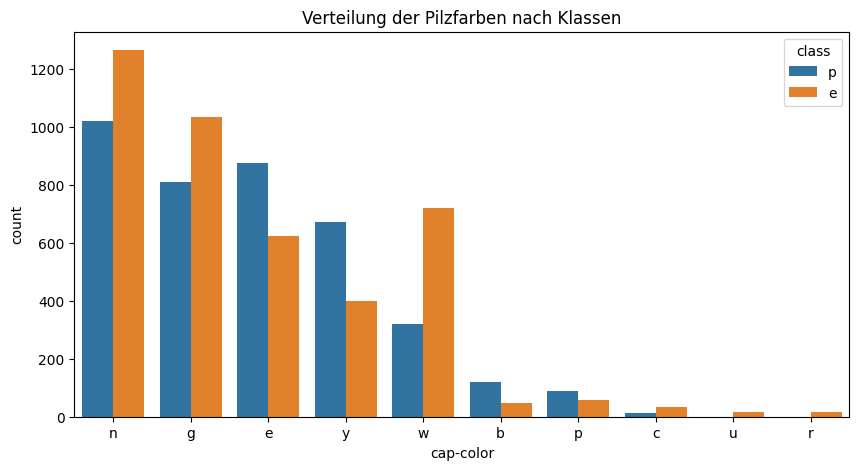

In [10]:
# Determine the frequency of the classes and sort by size
cap_color_counts = mushroom_data['cap-color'].value_counts().sort_values(ascending=False).index

# Visualization of the distribution of mushroom colors by class
plt.figure(figsize=(10, 5))
sns.countplot(x='cap-color', hue='class', data=mushroom_data, order=cap_color_counts, legend=True)
plt.title('Distribution of mushroom colors by class')
plt.show()

In [11]:
columns = mushroom_data.columns

# Print unique values and their counts for each feature based on class
for feature in columns:
    print("===================================")
    print(f"Feature: {feature}")
    
    # Edible Mushrooms
    edible_data = mushroom_data[mushroom_data['class'] == 'e'][feature]
    print("Edible Mushrooms:")
    print(edible_data.value_counts())
    print("\n")
    
    # Poisonous Mushrooms
    poisonous_data = mushroom_data[mushroom_data['class'] == 'p'][feature]
    print("Poisonous Mushrooms:")
    print(poisonous_data.value_counts())
    print("\n")


Feature: class
Edible Mushrooms:
class
e    4208
Name: count, dtype: int64


Poisonous Mushrooms:
class
p    3916
Name: count, dtype: int64


Feature: cap-shape
Edible Mushrooms:
cap-shape
x    1948
f    1596
b     404
k     228
s      32
Name: count, dtype: int64


Poisonous Mushrooms:
cap-shape
x    1708
f    1556
k     600
b      48
c       4
Name: count, dtype: int64


Feature: cap-surface
Edible Mushrooms:
cap-surface
f    1560
y    1504
s    1144
Name: count, dtype: int64


Poisonous Mushrooms:
cap-surface
y    1740
s    1412
f     760
g       4
Name: count, dtype: int64


Feature: cap-color
Edible Mushrooms:
cap-color
n    1264
g    1032
w     720
e     624
y     400
p      56
b      48
c      32
u      16
r      16
Name: count, dtype: int64


Poisonous Mushrooms:
cap-color
n    1020
e     876
g     808
y     672
w     320
b     120
p      88
c      12
Name: count, dtype: int64


Feature: bruises
Edible Mushrooms:
bruises
t    2752
f    1456
Name: count, dtype: int64


Poisonous

     START MACHINE LEARNING

In [12]:
# Set X as Dataframe without Index
X=mushroom_data.drop('class', axis=1) 

# Set y as Index (edible, poisonous)
y=mushroom_data['class'] 

# Show first 5 rows of X
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


    Encoding due to categorial variables

In [13]:
# Use LabelEncoder for X and y
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

# Split dataset in training and test
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Number of samples for training set:{X_train.shape}")
print(f"Number of samples for test set:{X_test.shape}")

Number of samples for training set:(6499, 22)
Number of samples for test set:(1625, 22)


    Feature selection

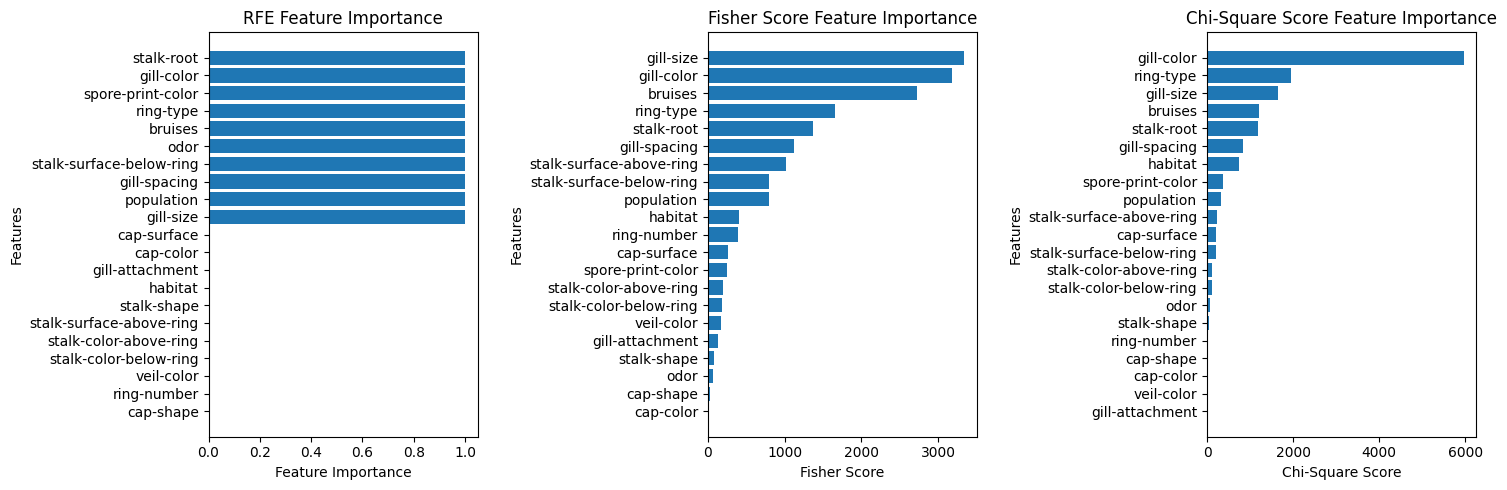

In [14]:
# Initialization of the RandomForestClassifier
randomForest = RandomForestClassifier()

# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=randomForest, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)
rfe_scores = rfe.support_.astype(int)
sorted_rfe_indices = np.argsort(rfe_scores)[::1]

# Feature selection using Fisher score
fisher_scores, _ = f_classif(X, y)
sorted_fisher_indices = np.argsort(fisher_scores)[::1]

# Feature selection using chi-square-score
chi2_scores, _ = chi2(X, y)
sorted_chi2_indices = np.argsort(chi2_scores)[::1]

# Exclude "veil-type" from the sorted indices
sorted_rfe_indices = [i for i in sorted_rfe_indices if X.columns[i] != "veil-type"]
sorted_fisher_indices = [i for i in sorted_fisher_indices if X.columns[i] != "veil-type"]
sorted_chi2_indices = [i for i in sorted_chi2_indices if X.columns[i] != "veil-type"]

# Plotting all three feature-evaluation-models in descending order
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(range(len(sorted_rfe_indices)), rfe_scores[sorted_rfe_indices])
plt.yticks(range(len(sorted_rfe_indices)), [X.columns[i] for i in sorted_rfe_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RFE Feature Importance')

plt.subplot(1, 3, 2)
plt.barh(range(len(sorted_fisher_indices)), fisher_scores[sorted_fisher_indices])
plt.yticks(range(len(sorted_fisher_indices)), [X.columns[i] for i in sorted_fisher_indices])
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Fisher Score Feature Importance')

plt.subplot(1, 3, 3)
plt.barh(range(len(sorted_chi2_indices)), chi2_scores[sorted_chi2_indices])
plt.yticks(range(len(sorted_chi2_indices)), [X.columns[i] for i in sorted_chi2_indices])
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Chi-Square Score Feature Importance')

plt.tight_layout()
plt.show()

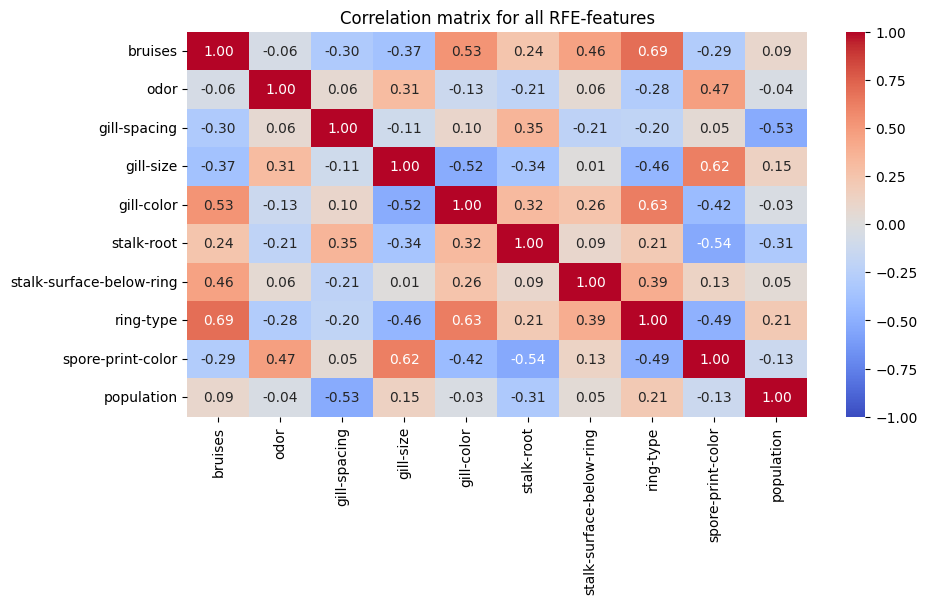

In [15]:
# Heatmap for all RFE-Features
selected_features = ['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-below-ring', 'ring-type',
       'spore-print-color', 'population']

# Create a copy of the dataset to make changes
mushroom_data_encoded = mushroom_data.copy()

# Label encoding for categorical features
label_encoder = LabelEncoder()
for feature in selected_features:
    mushroom_data_encoded[feature] = label_encoder.fit_transform(mushroom_data_encoded[feature])

# Calculating the correlation matrix
correlation_matrix = mushroom_data_encoded[selected_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix for all RFE-features')
plt.show()


     Dummy classifier

In [16]:
# use selected features from fisher-score
selected_features = [
    'stalk-surface-below-ring', 'stalk-surface-above-ring', 
    'gill-spacing', 'stalk-root', 'ring-type', 
    'bruises', 'gill-color', 'gill-size'
]

# convert selected features to numerical indexes
selected_indices = [X_train.columns.get_loc(feature) for feature in selected_features]

# Dummy-Classifier initialisieren und trainieren
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)
dummy_clf.fit(X_train, Y_train)

# Vorhersagen treffen
y_pred = dummy_clf.predict(X_test)

# Genauigkeit auswerten
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy of the Dummy Classifier: {accuracy:.4f}")

# Evaluation of the model on the test data
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred, target_names=["Edible", "Poisonous"])
print(classification_rep)

Accuracy of the Dummy Classifier: 0.4775
              precision    recall  f1-score   support

      Edible       0.50      0.48      0.49       843
   Poisonous       0.46      0.48      0.47       782

    accuracy                           0.48      1625
   macro avg       0.48      0.48      0.48      1625
weighted avg       0.48      0.48      0.48      1625



     k-Nearest-Neighbour

In [17]:
# Extract the selected features from the dataset
X_train_selected = X_train[selected_features]

# List of values for k from 1 to 20 for future iterations
k_values = list(range(1, 21))

# Initialize empty list for saving accuracy scores
accuracies = []

# Iterate over k-values
for k in k_values:
    # Initialize kNN-classificator with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross-validation to estimate the accuracy and standard deviation
    scores = cross_val_score(knn, X_train_selected, Y_train, cv=5)
    
    # Calculate the mean value and standard deviation of the accuracy values
    mean_score = scores.mean()
    std_score = scores.std()
    
    # Calculate bootstrap standard deviation
    bootstrap_std_error = std_score / np.sqrt(len(scores))
    
    # Print for current k
    print(f"{mean_score:.4f} (+/- {bootstrap_std_error:.4f}) for k = {k}")
    
    # Save the mean accuracy score
    accuracies.append(mean_score)

0.9691 (+/- 0.0117) for k = 1
0.9897 (+/- 0.0008) for k = 2
0.9871 (+/- 0.0013) for k = 3
0.9897 (+/- 0.0008) for k = 4
0.9897 (+/- 0.0008) for k = 5
0.9891 (+/- 0.0011) for k = 6
0.9891 (+/- 0.0011) for k = 7
0.9891 (+/- 0.0011) for k = 8
0.9891 (+/- 0.0011) for k = 9
0.9891 (+/- 0.0011) for k = 10
0.9891 (+/- 0.0011) for k = 11
0.9889 (+/- 0.0010) for k = 12
0.9880 (+/- 0.0007) for k = 13
0.9877 (+/- 0.0008) for k = 14
0.9877 (+/- 0.0007) for k = 15
0.9874 (+/- 0.0008) for k = 16
0.9872 (+/- 0.0008) for k = 17
0.9872 (+/- 0.0008) for k = 18
0.9872 (+/- 0.0008) for k = 19
0.9872 (+/- 0.0008) for k = 20


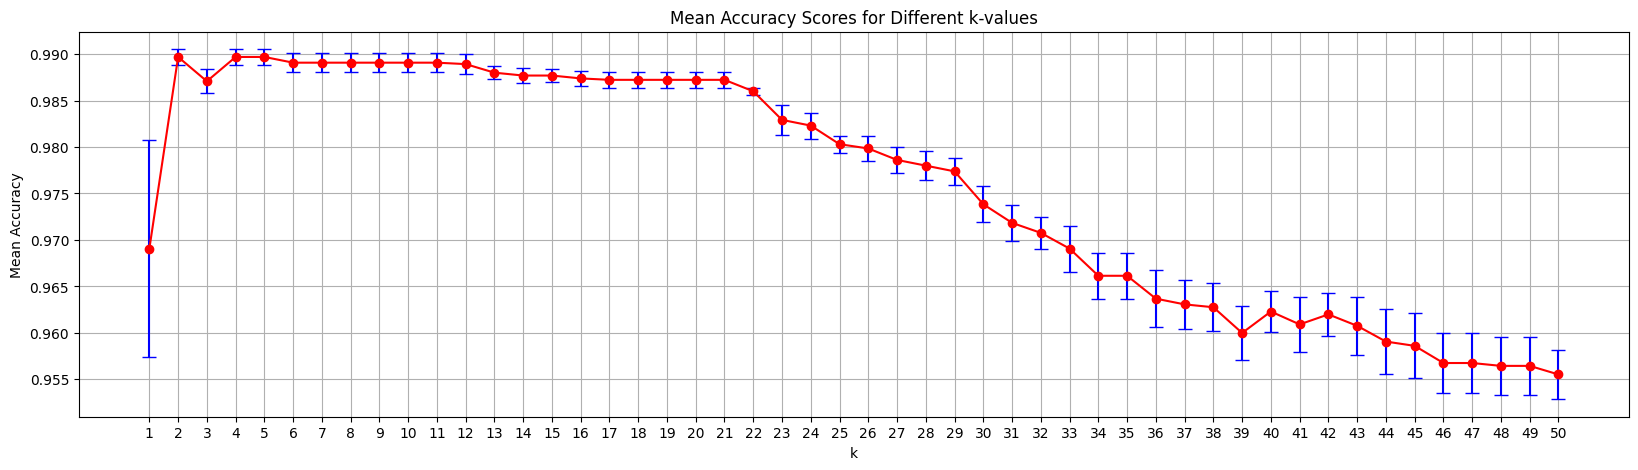

In [18]:
# List of values for k from 1 to 50 for future iterations
k_values = list(range(1, 51))

# Initialize empty lists for saving accuracy scores and standard errors
accuracies = []
std_deviations = []

# Iterate over k-values
for k in k_values:
    # Initialize kNN-classificator with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross-validation to estimate the accuracy and standard deviation
    scores = cross_val_score(knn, X_train_selected, Y_train, cv=5)
    
    # Calculate the mean value and standard deviation of the accuracy values
    mean_score = scores.mean()
    std_score = scores.std()
    
    # Calculate bootstrap standard deviation
    bootstrap_std_error = std_score / np.sqrt(len(scores))
    
    # Save the mean accuracy score and standard error
    accuracies.append(mean_score)
    std_deviations.append(bootstrap_std_error)

# Convert lists to arrays
accuracies = np.array(accuracies)
std_errors = np.array(std_deviations)

# Plotting
plt.figure(figsize=(20, 5))
plt.errorbar(k_values, accuracies, yerr=std_errors, fmt='-o', color='r', ecolor='b', capsize=5)
plt.title('Mean Accuracy Scores for Different k-values')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

    XG-Boost

In [19]:
# Encoding for xgBoost due to categorial variables
xg_encoder = LabelEncoder()
Y_train_encoded = xg_encoder.fit_transform(Y_train)
Y_test_encoded = xg_encoder.transform(Y_test)

# Defining a list of booster parameters
booster_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

# Iterate over the booster parameters
for max_depth in booster_params['max_depth']:
    for learning_rate in booster_params['learning_rate']:
        # Initialize the XGBoost classifier with the current parameters
        xgb_classifier = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate)
        
        # Cross-validation to estimate the accuracy and standard deviation
        scores = cross_val_score(xgb_classifier, X_train_selected, Y_train_encoded, cv=5)
        
        # Calculate the mean value and standard deviation of the accuracy values
        mean_score = scores.mean()
        std_score = scores.std()
        
        # Calculate bootstrap standard deviation
        bootstrap_std_error = std_score / np.sqrt(5)
        
        # Print for current combination of parameters
        print(f"{mean_score:.4f} (+/- {bootstrap_std_error:.4f}) for {{'max_depth': {max_depth}, 'learning_rate': {learning_rate}}}")

0.9862 (+/- 0.0005) for {'max_depth': 3, 'learning_rate': 0.1}
0.9383 (+/- 0.0037) for {'max_depth': 3, 'learning_rate': 0.01}
0.9168 (+/- 0.0030) for {'max_depth': 3, 'learning_rate': 0.001}
0.9897 (+/- 0.0008) for {'max_depth': 5, 'learning_rate': 0.1}
0.9675 (+/- 0.0026) for {'max_depth': 5, 'learning_rate': 0.01}
0.9683 (+/- 0.0027) for {'max_depth': 5, 'learning_rate': 0.001}
0.9897 (+/- 0.0008) for {'max_depth': 7, 'learning_rate': 0.1}
0.9858 (+/- 0.0015) for {'max_depth': 7, 'learning_rate': 0.01}
0.9858 (+/- 0.0014) for {'max_depth': 7, 'learning_rate': 0.001}


     Random-Forest-Classificator

Accuracy Random-Forest: 0.9897 (+/- 0.0019)

Classification report:
              precision    recall  f1-score   support

      Edible       0.98      1.00      0.99       843
   Poisonous       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



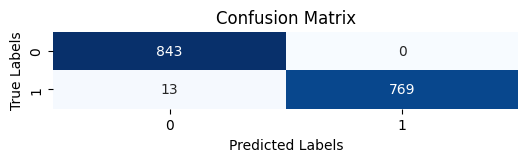

In [20]:
# Select data using the selected features
X_train_selected = X_train.iloc[:, selected_indices]
X_test_selected = X_test.iloc[:, selected_indices]

# Identify columns with categorical data in the selected features
categorical_columns = X_train_selected.select_dtypes(include=['object']).columns

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Transform selected data
X_train_encoded = preprocessor.fit_transform(X_train_selected)
X_test_encoded = preprocessor.transform(X_test_selected)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Compute cross-validation scores
cv_scores = cross_val_score(rf_classifier, X_train_encoded, Y_train, cv=5, scoring='accuracy')

# Compute mean and standard deviation of cross-validation scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

# Fit the model on the training data
rf_classifier.fit(X_train_encoded, Y_train)

# Make predictions on test data
y_pred = rf_classifier.predict(X_test_encoded)

# Compute accuracy on the test data
accuracy = accuracy_score(Y_test, y_pred)

# Classification report
classification_rep = classification_report(Y_test, y_pred, target_names=["Edible", "Poisonous"])

# Show results
print(f'Accuracy Random-Forest: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})')
print('\nClassification report:')
print(classification_rep)

# Compute and plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


    Support-Vector-Machine

Accuracy SVM: 0.9401 (+/- 0.0059)
Classification report:

              precision    recall  f1-score   support

      Edible       0.94      0.95      0.95       843
   Poisonous       0.95      0.94      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



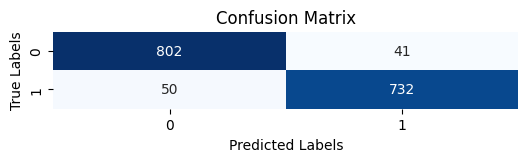

In [21]:
# Select only the chosen features from the training and test data
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize OrdinalEncoder for ordinal features and LabelEncoder for target labels
enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

# Transform the training and test features using OrdinalEncoder
x_train_transf = enc_x.fit_transform(X_train_selected)
x_test_transf = enc_x.transform(X_test_selected)

# Transform the training and test target labels using LabelEncoder
y_train_transf = enc_y.fit_transform(Y_train)
y_test_transf = enc_y.transform(Y_test)

# Initialize MinMaxScaler to scale the features to a specified range
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)

# Rescale the training features
x_train_rescaled = scaling.transform(x_train_transf)

# Set the regularization parameter C for the SVM
C = 1.0

# Initialize SVM classifier with linear kernel and fit to the rescaled training data
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

# Predict the target labels for the test features
y_pred_test = svc.predict(scaling.transform(x_test_transf))

# Define a custom scorer for accuracy
scorer = make_scorer(accuracy_score)

# Perform cross-validation on the SVM classifier
scores = cross_val_score(svc, x_train_rescaled, y_train_transf, cv=5, scoring=scorer)

# Compute the mean and standard deviation of the scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

# Print the results
print(f"Accuracy SVM: {mean_accuracy:.4f} (+/- {std_accuracy:.4f})")

# Print the classification report
print("Classification report:")
print()
print(classification_report(y_test_transf, y_pred_test, target_names=["Edible", "Poisonous"]))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test_transf, y_pred_test)
plt.figure(figsize=(6, 1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

    Hypertuning Support-Vector-Machine for precision and recall

In [22]:
# Define the hyperparameters to be tuned for SVM classifier
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10, 100]},
    {"kernel": ["poly"], "C": [1, 10, 100]},
]

# Define the scoring metric for evaluation
score = "precision"

print("# Tuning hyper-parameters for %s" % score)
print()

# Initialize GridSearchCV with SVM classifier, tuned parameters, and scoring metric
clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)

# Fit GridSearchCV to the rescaled training data
clf.fit(x_train_rescaled, y_train_transf)

# Print the best parameters found on the development set
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

# Print the grid scores on the development set
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]

# Loop over each combination of mean score, standard deviation, and hyperparameters
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

# Print the classification report on the test set
print("Classification report:")
print()

# Predict the target labels for the test features using the best estimator
y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))

# Print the classification report
print(classification_report(y_true, y_pred, target_names=["Edible", "Poisonous"]))
print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.941 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.941 (+/-0.010) for {'C': 10, 'kernel': 'linear'}
0.941 (+/-0.010) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.005) for {'C': 1, 'kernel': 'poly'}
0.988 (+/-0.004) for {'C': 10, 'kernel': 'poly'}
0.988 (+/-0.004) for {'C': 100, 'kernel': 'poly'}

Classification report:

              precision    recall  f1-score   support

      Edible       0.98      1.00      0.99       843
   Poisonous       1.00      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625




    AUC and ROC for Support-Vector-Machine

In [23]:
# Define the classifier with probability=True
classifier = svm.SVC(kernel='poly', C=100, probability=True).fit(x_train_rescaled, y_train_transf)

# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train_selected, Y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test_selected)[:, 1]

# Compute the AUC
auc = roc_auc_score(Y_test, y_pred_proba)

print(f"The Area Under the Curve (AUC) is: {auc:.4f}")

The Area Under the Curve (AUC) is: 0.9883


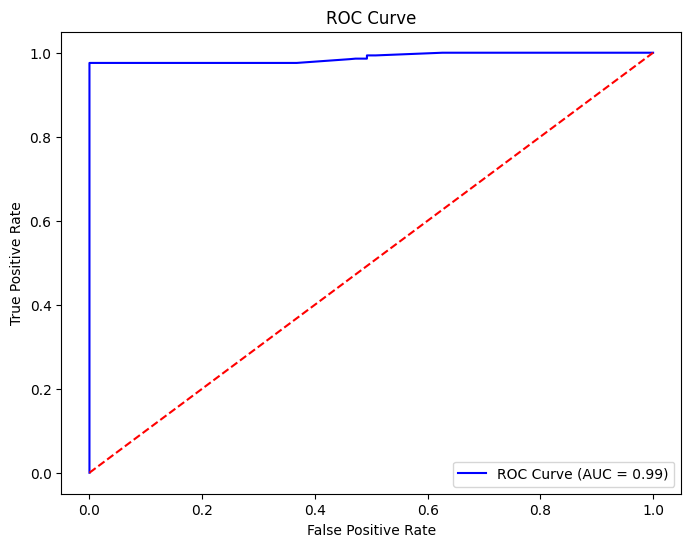

In [24]:
# Calculate ROC-curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# Plot ROC-curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()